# Fuzzy Modeling Try

In [8]:
import numpy as np
import skfuzzy.control as ctrl
import skfuzzy as fuzz

# prior to this, need to scale income to 0-10
income = ctrl.Antecedent(np.arange(0, 11, 1), 'income')
investment_score = ctrl.Consequent(np.arange(0, 11, 1), 'investment_score')


## Income -> Investment Score

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


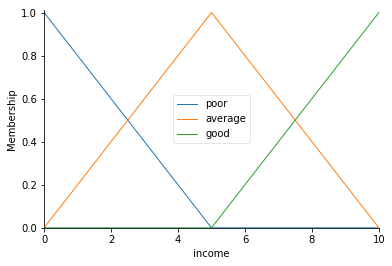

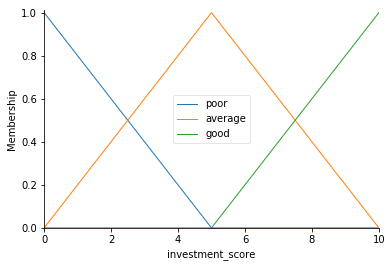

In [9]:
income.automf(3)
investment_score.automf(3)
income.view()
investment_score.view()

# Simple rule first
rule1 = ctrl.Rule(income['poor'], investment_score['poor'])
rule2 = ctrl.Rule(income['average'], investment_score['average'])
rule3 = ctrl.Rule(income['good'], investment_score['good'])

5.22916666667


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


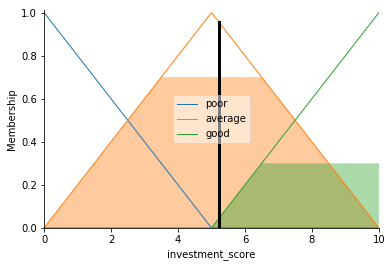

In [10]:
investment_score_ctrl = ctrl.ControlSystem([rule1, rule2, rule3])
investment_score_t = ctrl.ControlSystemSimulation(investment_score_ctrl)
investment_score_t.input['income'] = 6.5

# Crunch the numbers
investment_score_t.compute()
print (investment_score_t.output['investment_score'])
investment_score.view(sim=investment_score_t)

## Age -> Investment Score

/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


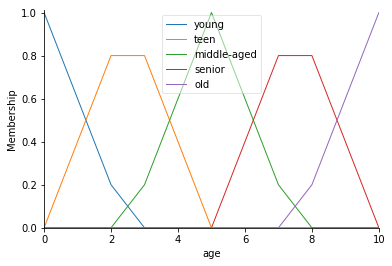

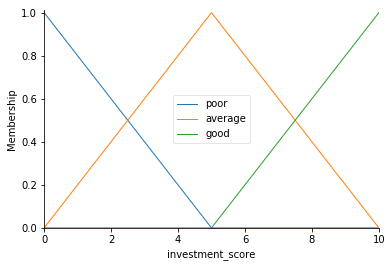

In [11]:
import numpy as np
import skfuzzy.control as ctrl
import skfuzzy as fuzz
# prior to this, need to scale age to 0-10
age = ctrl.Antecedent(np.arange(0, 11, 1), 'age')
investment_score = ctrl.Consequent(np.arange(0, 11, 1), 'investment_score')
age.automf(5, names=['young', 'teen', 'middle-aged', 'senior', 'old'])
investment_score.automf(3)
age.view()
investment_score.view()



In [12]:
# Middle age people have best investment score
rule1 = ctrl.Rule(age['young'], investment_score['poor'])
rule2 = ctrl.Rule(age['teen'], investment_score['average'])
rule3 = ctrl.Rule(age['middle-aged'], investment_score['good'])
rule4 = ctrl.Rule(age['senior'], investment_score['average'])
rule5 = ctrl.Rule(age['old'], investment_score['poor'])

8.33333333333


/Users/pierlim/anaconda/envs/tensorflow/lib/python3.6/site-packages/matplotlib/figure.py:457: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


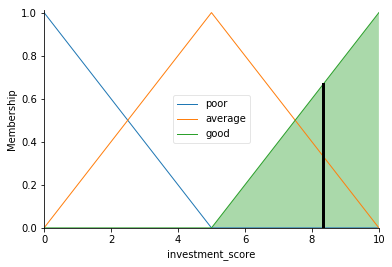

In [13]:
investment_score_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5])
investment_score_t = ctrl.ControlSystemSimulation(investment_score_ctrl)
investment_score_t.input['age'] = 5

# Crunch the numbers
investment_score_t.compute()
print (investment_score_t.output['investment_score'])
investment_score.view(sim=investment_score_t)